In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib_inline
import seaborn as sns
from sklearn import preprocessing
from scipy import stats

Загрузка данных

In [25]:
df = pd.read_csv("data.csv")
df

Unnamed: 0                                id  dt_1  dt_2  dt_3  dt_4  \
0                0  000460a7ff2ff5018ff7200cbd51384a     0     0     0  7376   
1                2  000766522fd1bb52ee1a40369dfef378  8282     0     0     0   
2                4  003b6e35dbae9f6addd1479a1594eeca  9989     0     0     0   
3                6  0067a6a53ca3b2384cce4910f9176523  7329     0     0     0   
4                7  00a0343d1d3355547f83e3b4efa4bea4  7316     0     0     0   
...            ...                               ...   ...   ...   ...   ...   
403522      489877  feda7351a8699d19991074bbc94f8b40  9423     0     0  2383   
403523      489878  fef61da102b7adcf11cef0619d337f03     0     0     0     0   
403524      489879  ff3c43a53bb68025c42b0cf317d01cb4  5178     0     0  1698   
403525      489881  ff595f9f999801aa0a72bf0ee04d5bb8     0  7237     0     0   
403526      489882  ffd703d47bccdbf461f629c64e18f1d2  7417     0     0  3916   

        dt_4_2  dt_4_3   dt_5   dt_6  ...  flag_14  flag_15  flag_16  flag_17  \
0            0       0      0   9908  ...        0        0        0        0   
1            0       0   9364      0  ...        0        0        0        0   
2            0       0      0  10035  ...        0        0        0        0   
3            0       0     31      0  ...        0        0        0        0   
4            0       0    433      0  ...        0        0        0        0   
...        ...     ...    ...    ...  ...      ...      ...      ...      ...   
403522       0       0     87   9488  ...        0        0        0        0   
403523       0       0  10739  10474  ...        0        0        0        0   
403524       0       0      0      0  ...        0        0        0        0   
403525       0       0   2044      0  ...        0        0        0        0   
403526       0       0     26      0  ...        0        0        0        0   

        flag_18  flag_19  flag_20       flag_21  label_flag  label_dt  
0             0        0        0  3.462374e+05           7       177  
1             0        0        0  0.000000e+00          14       916  
2             0        0        1  3.462374e+05          15        26  
3             0        0        0  1.298467e+06          14      2136  
4             0        0        0  0.000000e+00          14        96  
...         ...      ...      ...           ...         ...       ...  
403522        0        0        0  3.462374e+05           4      1000  
403523        0        0        0  3.462374e+05           1        31  
403524        0        0        0  0.000000e+00          14      2212  
403525        0        0        0  0.000000e+00           1        80  
403526        0        0        0  0.000000e+00          14       519  

[403527 rows x 41 columns]

По всей видимости, первая колонка содержит номера строк или номера записей. Есть пропущенные номера, но, считаю, эта колонка не влияет на результат, поэтому анализироваться не будет. Вторая колонка содержит id. Проверим, есть ли строки относящиеся к одному id.

In [26]:
df.id.nunique() == len(df.id)

True

In [27]:
df.duplicated().sum() # проверила на дубликаты еще раз

0

Таких строк нет. Поэтому колонка id в анализе участвовать не будет. Теперь посмотрим, сколько всего меток есть в данных, т.е. на какое количество классов в дальнейшем будут разделены данные  

In [28]:
labels = list(df.label_flag.sort_values().unique())
k = len(labels)
labels

[1, 4, 7, 9, 14, 15]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403527 entries, 0 to 403526
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  403527 non-null  int64  
 1   id          403527 non-null  object 
 2   dt_1        403527 non-null  int64  
 3   dt_2        403527 non-null  int64  
 4   dt_3        403527 non-null  int64  
 5   dt_4        403527 non-null  int64  
 6   dt_4_2      403527 non-null  int64  
 7   dt_4_3      403527 non-null  int64  
 8   dt_5        403527 non-null  int64  
 9   dt_6        403527 non-null  int64  
 10  dt_7        403527 non-null  int64  
 11  dt_7_2      403527 non-null  int64  
 12  dt_8        403527 non-null  int64  
 13  dt_9        403527 non-null  int64  
 14  dt_9_2      403527 non-null  int64  
 15  dt_9_3      403527 non-null  int64  
 16  dt_10       403527 non-null  int64  
 17  dt_11       403527 non-null  int64  
 18  flag_1      403527 non-null  int64  
 19  fl

Пропущенных данных тоже нет. Подставлять значения или удалять строки/столбцы необходимости нет. Теперь посмотрим на распределение данных. Для начала создам отдельные списки с названиями колонок категориальных и обозначающих временные метки для удобства. Переименовывать колонки не буду, потому что не очень ясно, откуда данные и что они обозначают. Предположу, что названия колонок корректны  

In [30]:
time_label_columns = []
categorical_columns = []
for s in df.columns:
    if s.startswith("dt_"):
        time_label_columns.append(s)
    elif s.startswith("flag_"):
        categorical_columns.append(s)
target_col = 'label_flag'

Посмотрим, как распределены данные. В каком масштабе, выбросы и прочее 

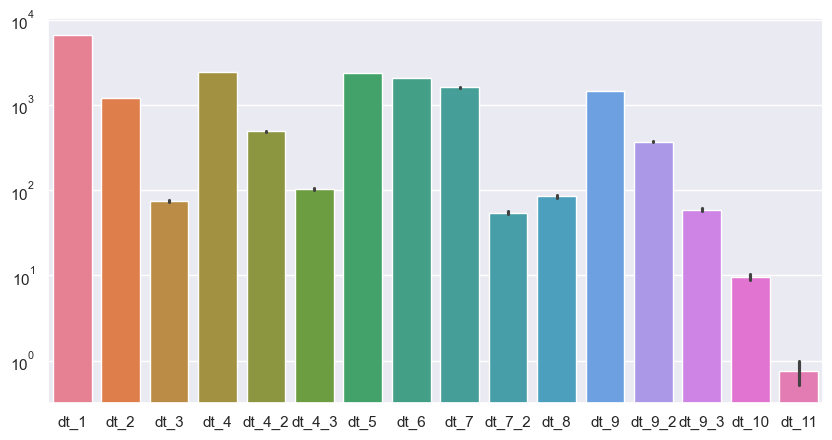

In [31]:
sns.set(rc={'figure.figsize' : (10, 5)})
pic = sns.barplot(df[time_label_columns])
pic.set_yscale('log')

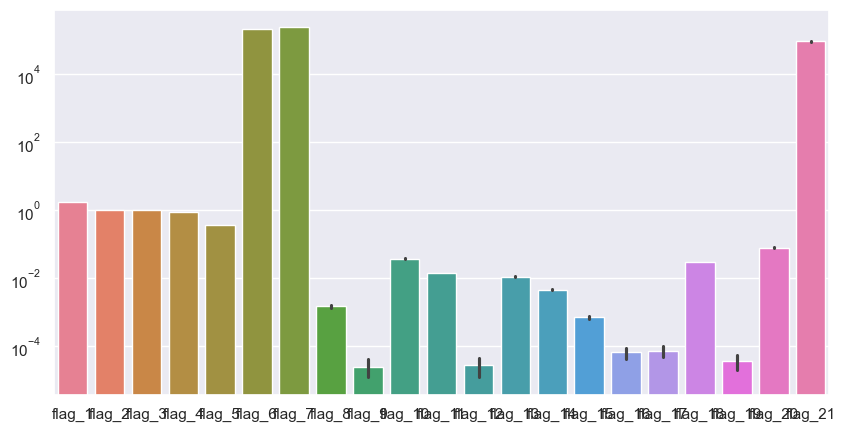

In [32]:
sns.set(rc={'figure.figsize' : (10, 5)})
pic = sns.barplot(df[categorical_columns])
pic.set_yscale('log')

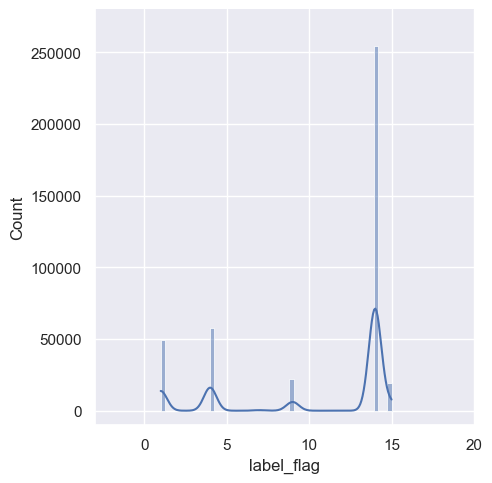

In [33]:
sns.set(rc={'figure.figsize' : (10, 5)})
pic1 = sns.displot(df[target_col], kde=True)
pic1.set(ylim=(-10000, 280000), xlim=(-3, 20))

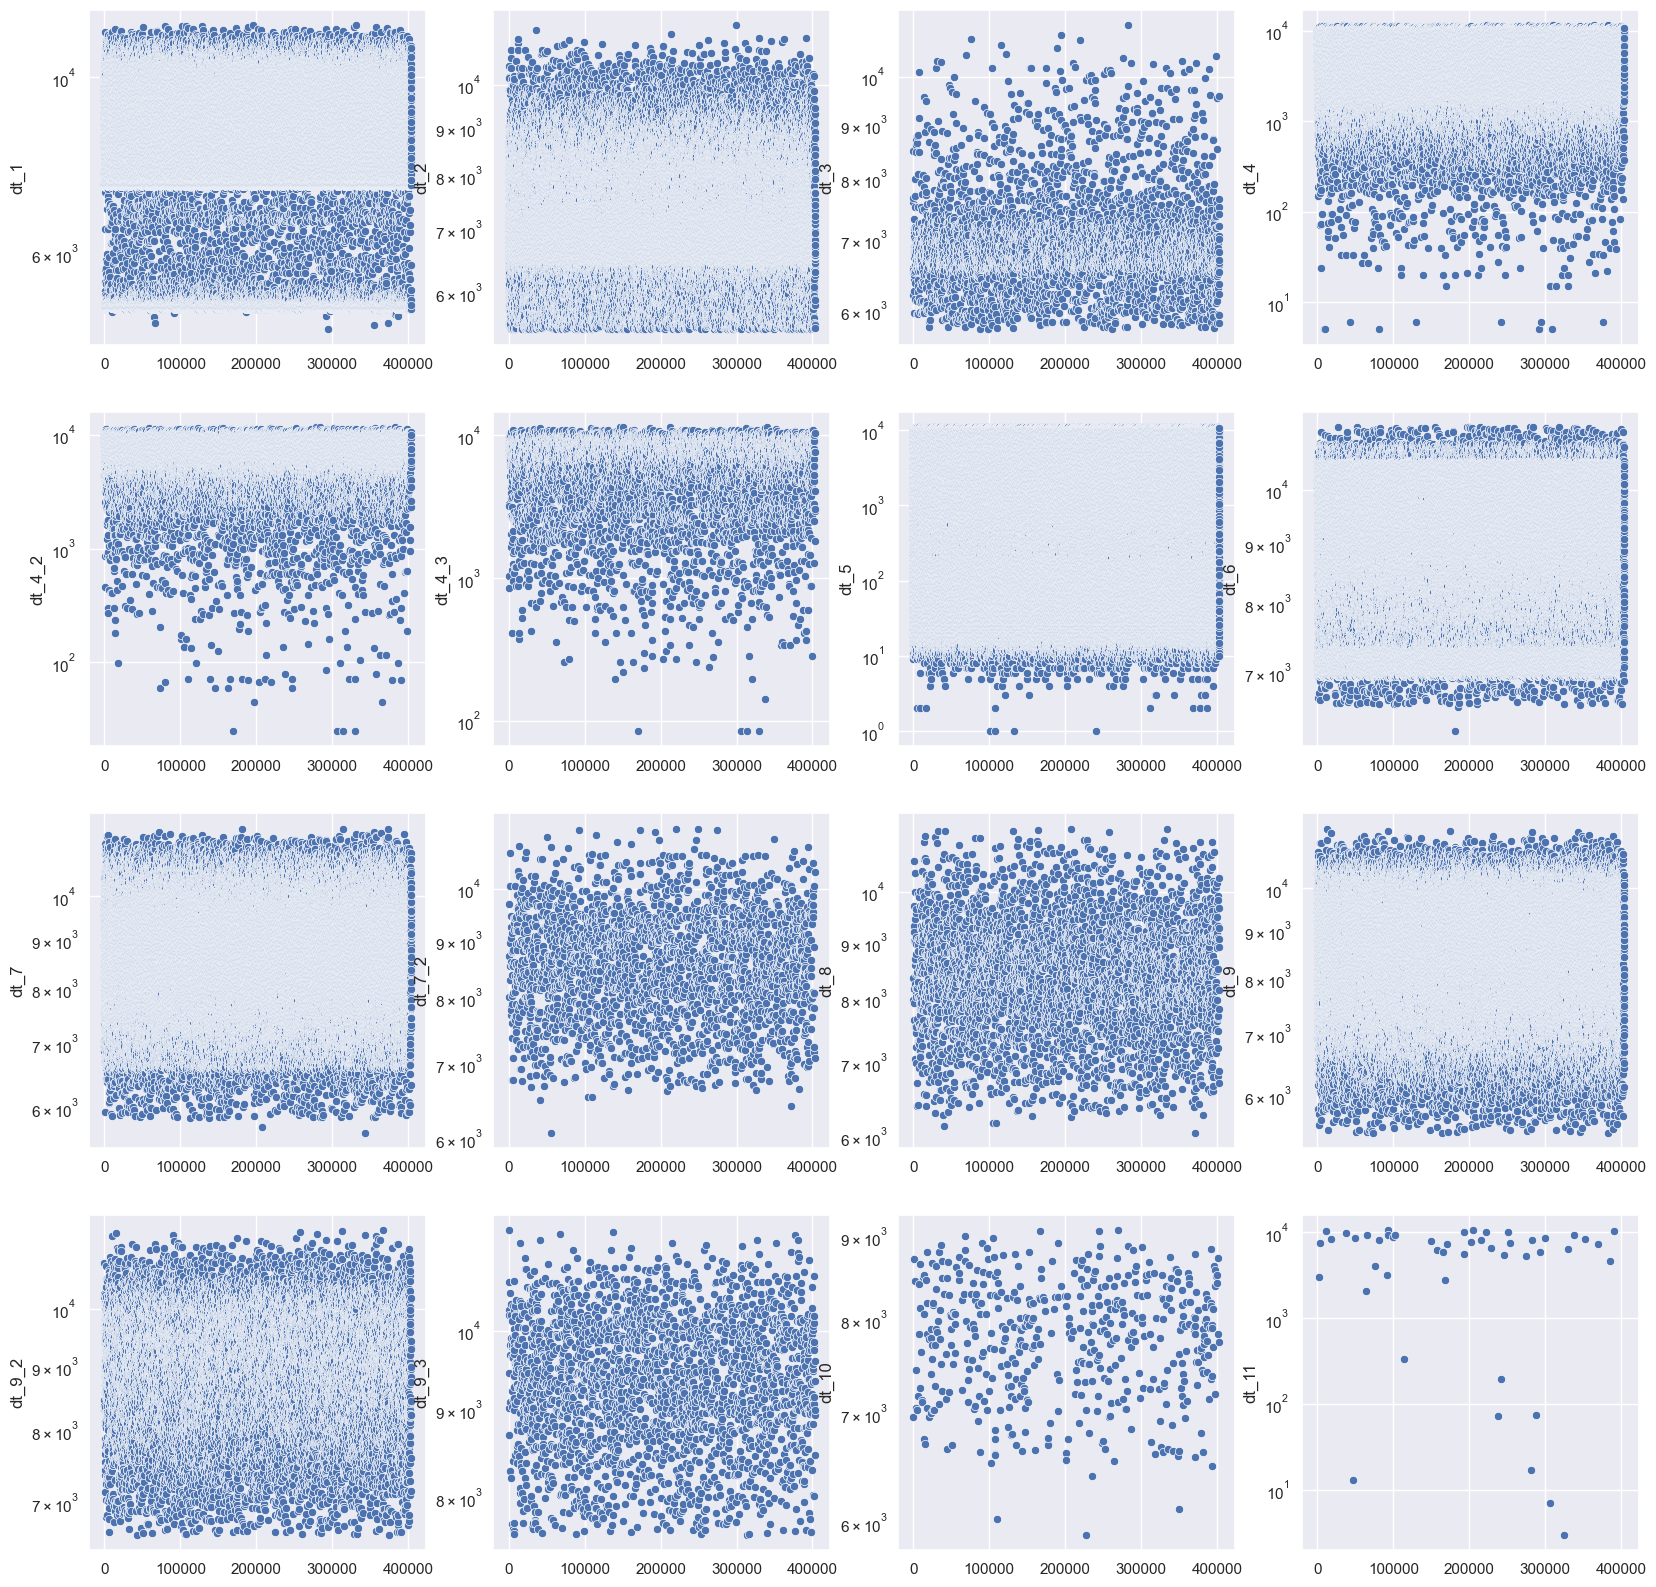

In [34]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i, col in enumerate(time_label_columns):
    #print(col)
    sns.scatterplot(df[col], ax=axes[i // 4][i % 4]).set_yscale('log')
plt.savefig("scat_time.png")

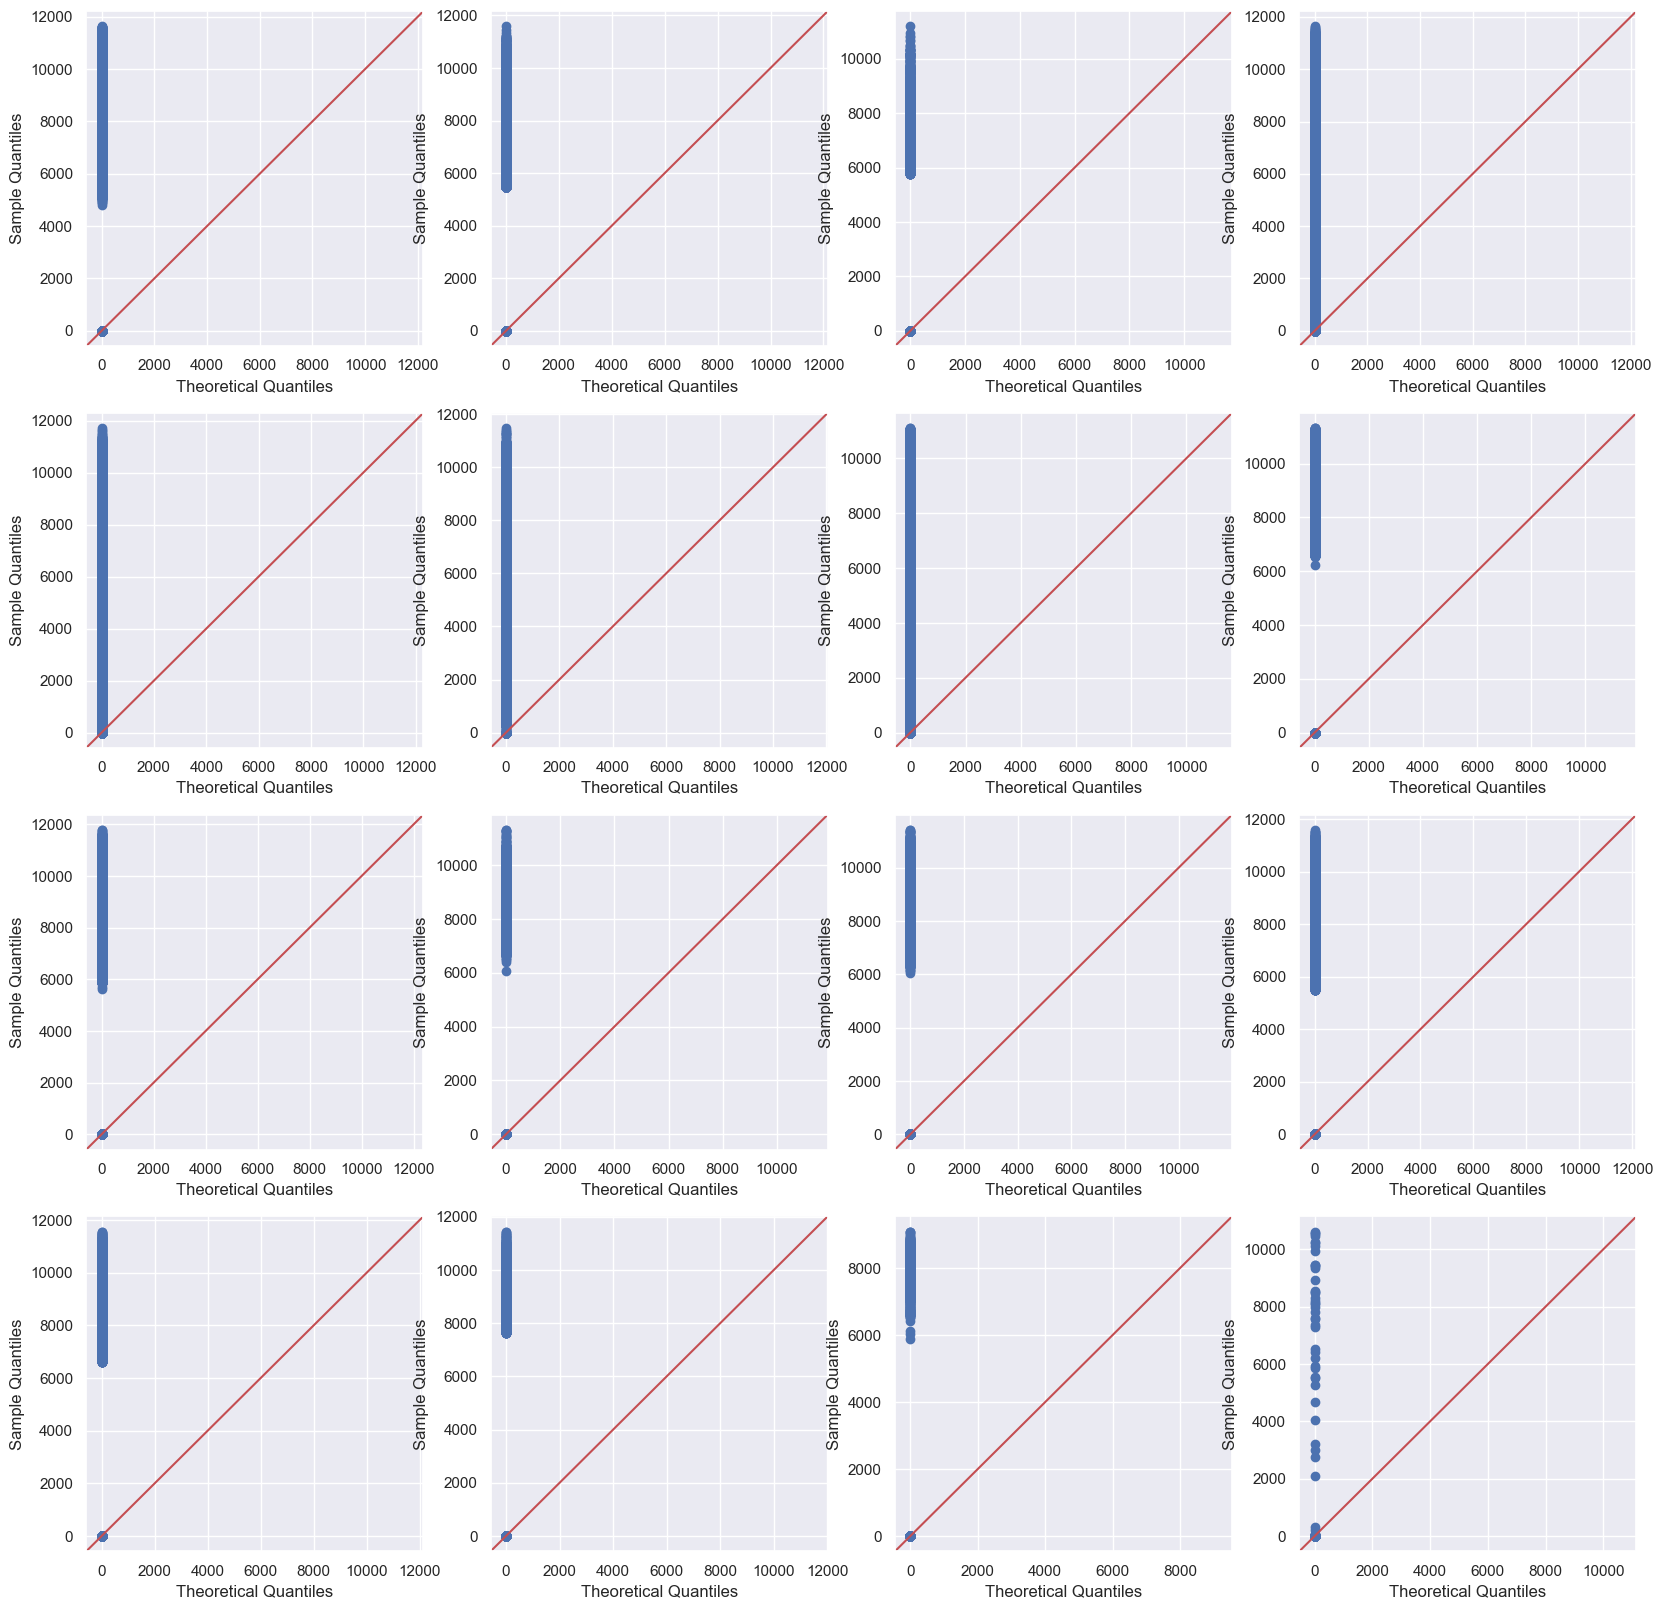

In [56]:
import statsmodels.api as sm
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i, col in enumerate(time_label_columns):
    #print(col)
    sm.qqplot(df[col], ax=axes[i // 4][i % 4], line='45')
plt.savefig("scat_time.png")

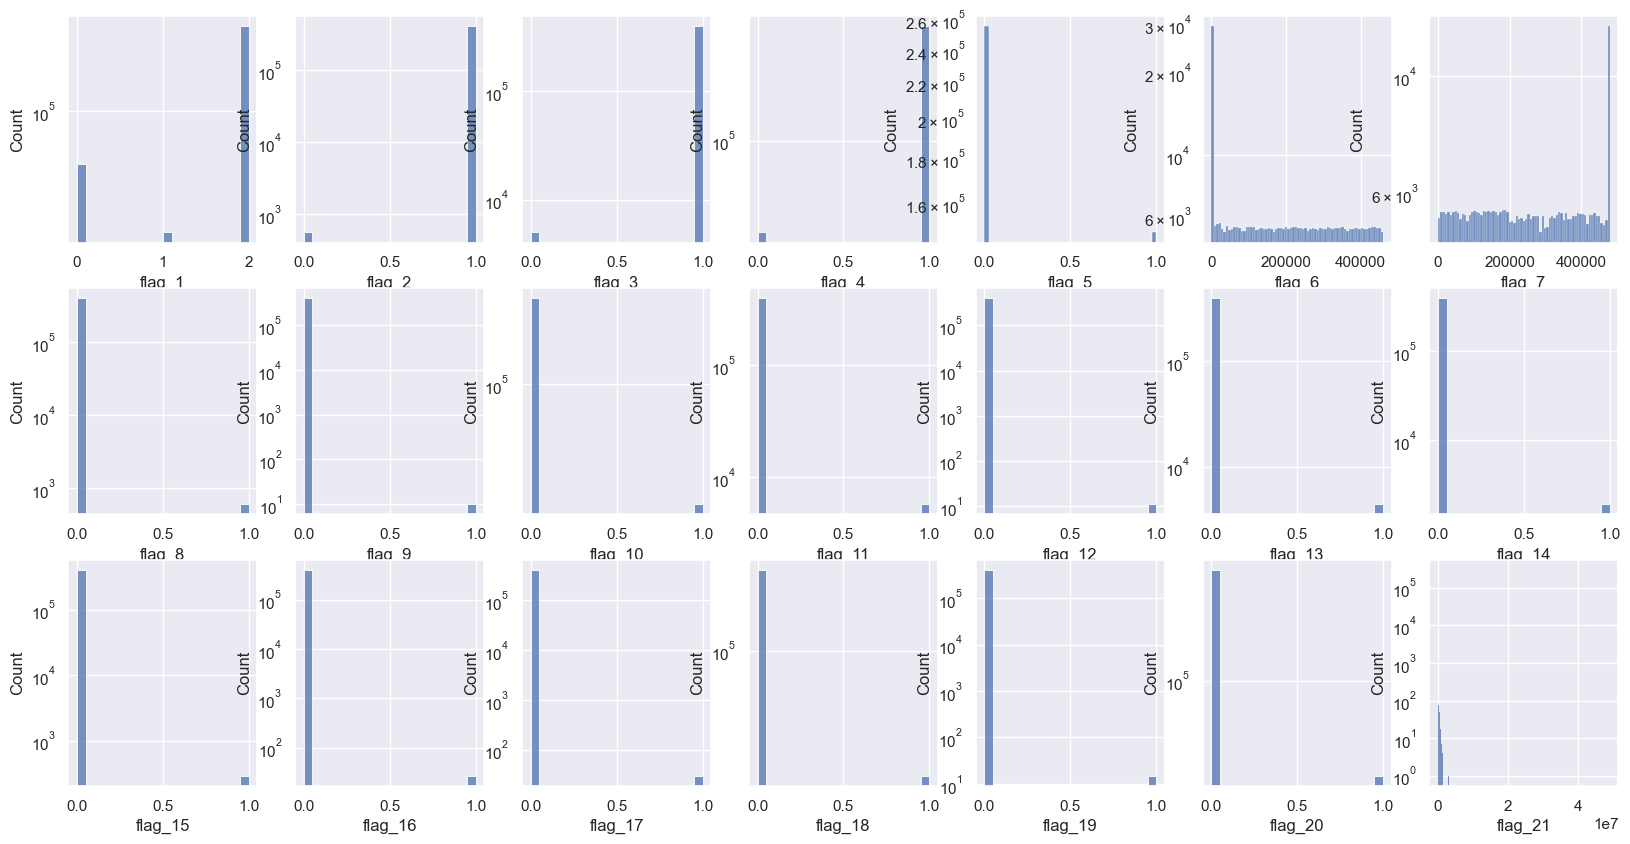

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20,10))
for i, col in enumerate(categorical_columns):
    #print(col)
    sns.histplot(df[col], ax=axes[i // 7][i % 7]).set_yscale('log')
plt.savefig("hists_cat.png")

Данные не напоминают стандартное распределение, значит, дальше будем использовать стандартизацию. Что касается данных временных меток, там присутствует много данных, где, видимо, метка не установлена, т.е. значение установлено нулевое. Вряд ли все эти события были зарегистрированы ровно в момент начала отсчета. В дальнейшем стоит подумать об использовании таких данных. Либо, возможно, нули стоит заменить на среднее значение по столбцу или что-то подобное 


In [57]:
# тут я просто посмотрела, какие категории есть
for i, col in enumerate(categorical_columns):
    print(df[col].value_counts())
    print('\n'+'*'*30)

flag_1
2    338935
0     46999
1     17593
Name: count, dtype: int64

******************************
flag_2
1    402962
0       565
Name: count, dtype: int64

******************************
flag_3
1    398520
0      5007
Name: count, dtype: int64

******************************
flag_4
1    368397
0     35130
Name: count, dtype: int64

******************************
flag_5
0    255356
1    148171
Name: count, dtype: int64

******************************
flag_6
7         24030
210443       12
203954       10
161077        9
144889        9
          ...  
201698        1
258047        1
447716        1
179538        1
90735         1
Name: count, Length: 379053, dtype: int64

******************************
flag_7
480176    6994
353331      10
356276       9
18804        8
10820        8
          ... 
126426       1
28884        1
254494       1
227030       1
156924       1
Name: count, Length: 395756, dtype: int64

******************************
flag_8
0    402924
1       603
Name: cou

<Figure size 1200x800 with 0 Axes>

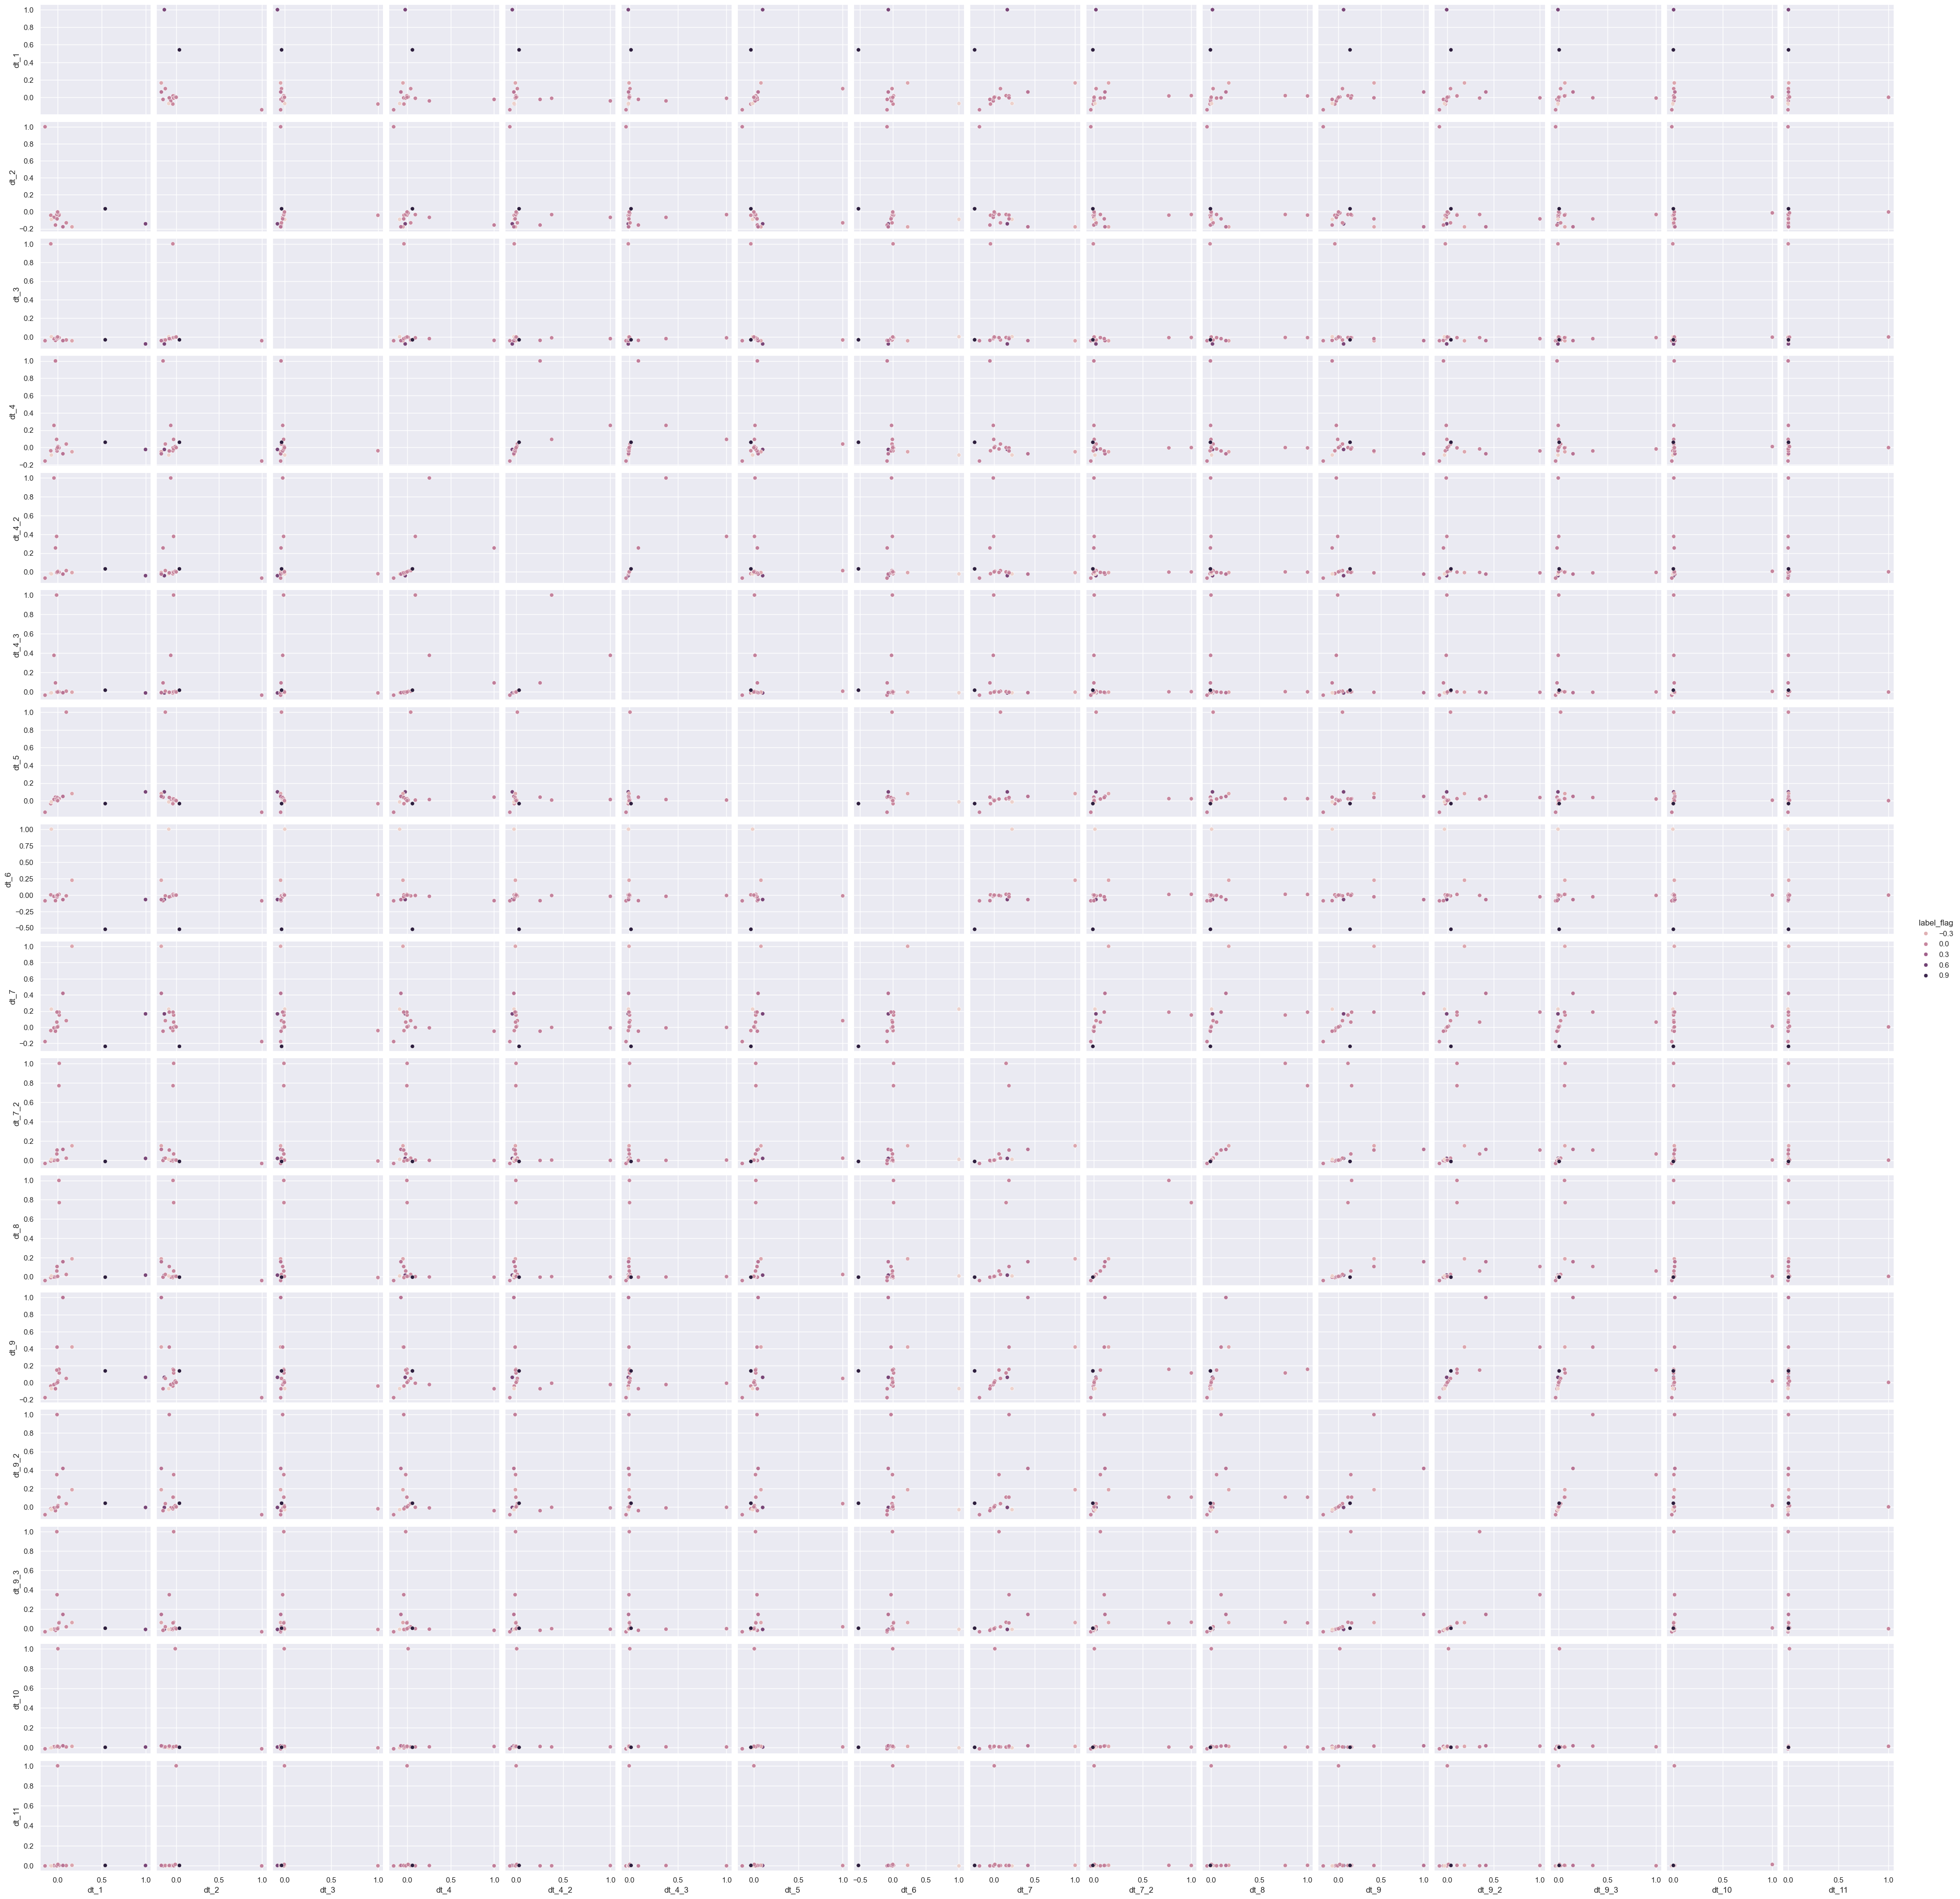

In [37]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[time_label_columns+[target_col]].corr(), hue=target_col)
plt.savefig("pair_plot_time.png")

<Figure size 1200x800 with 0 Axes>

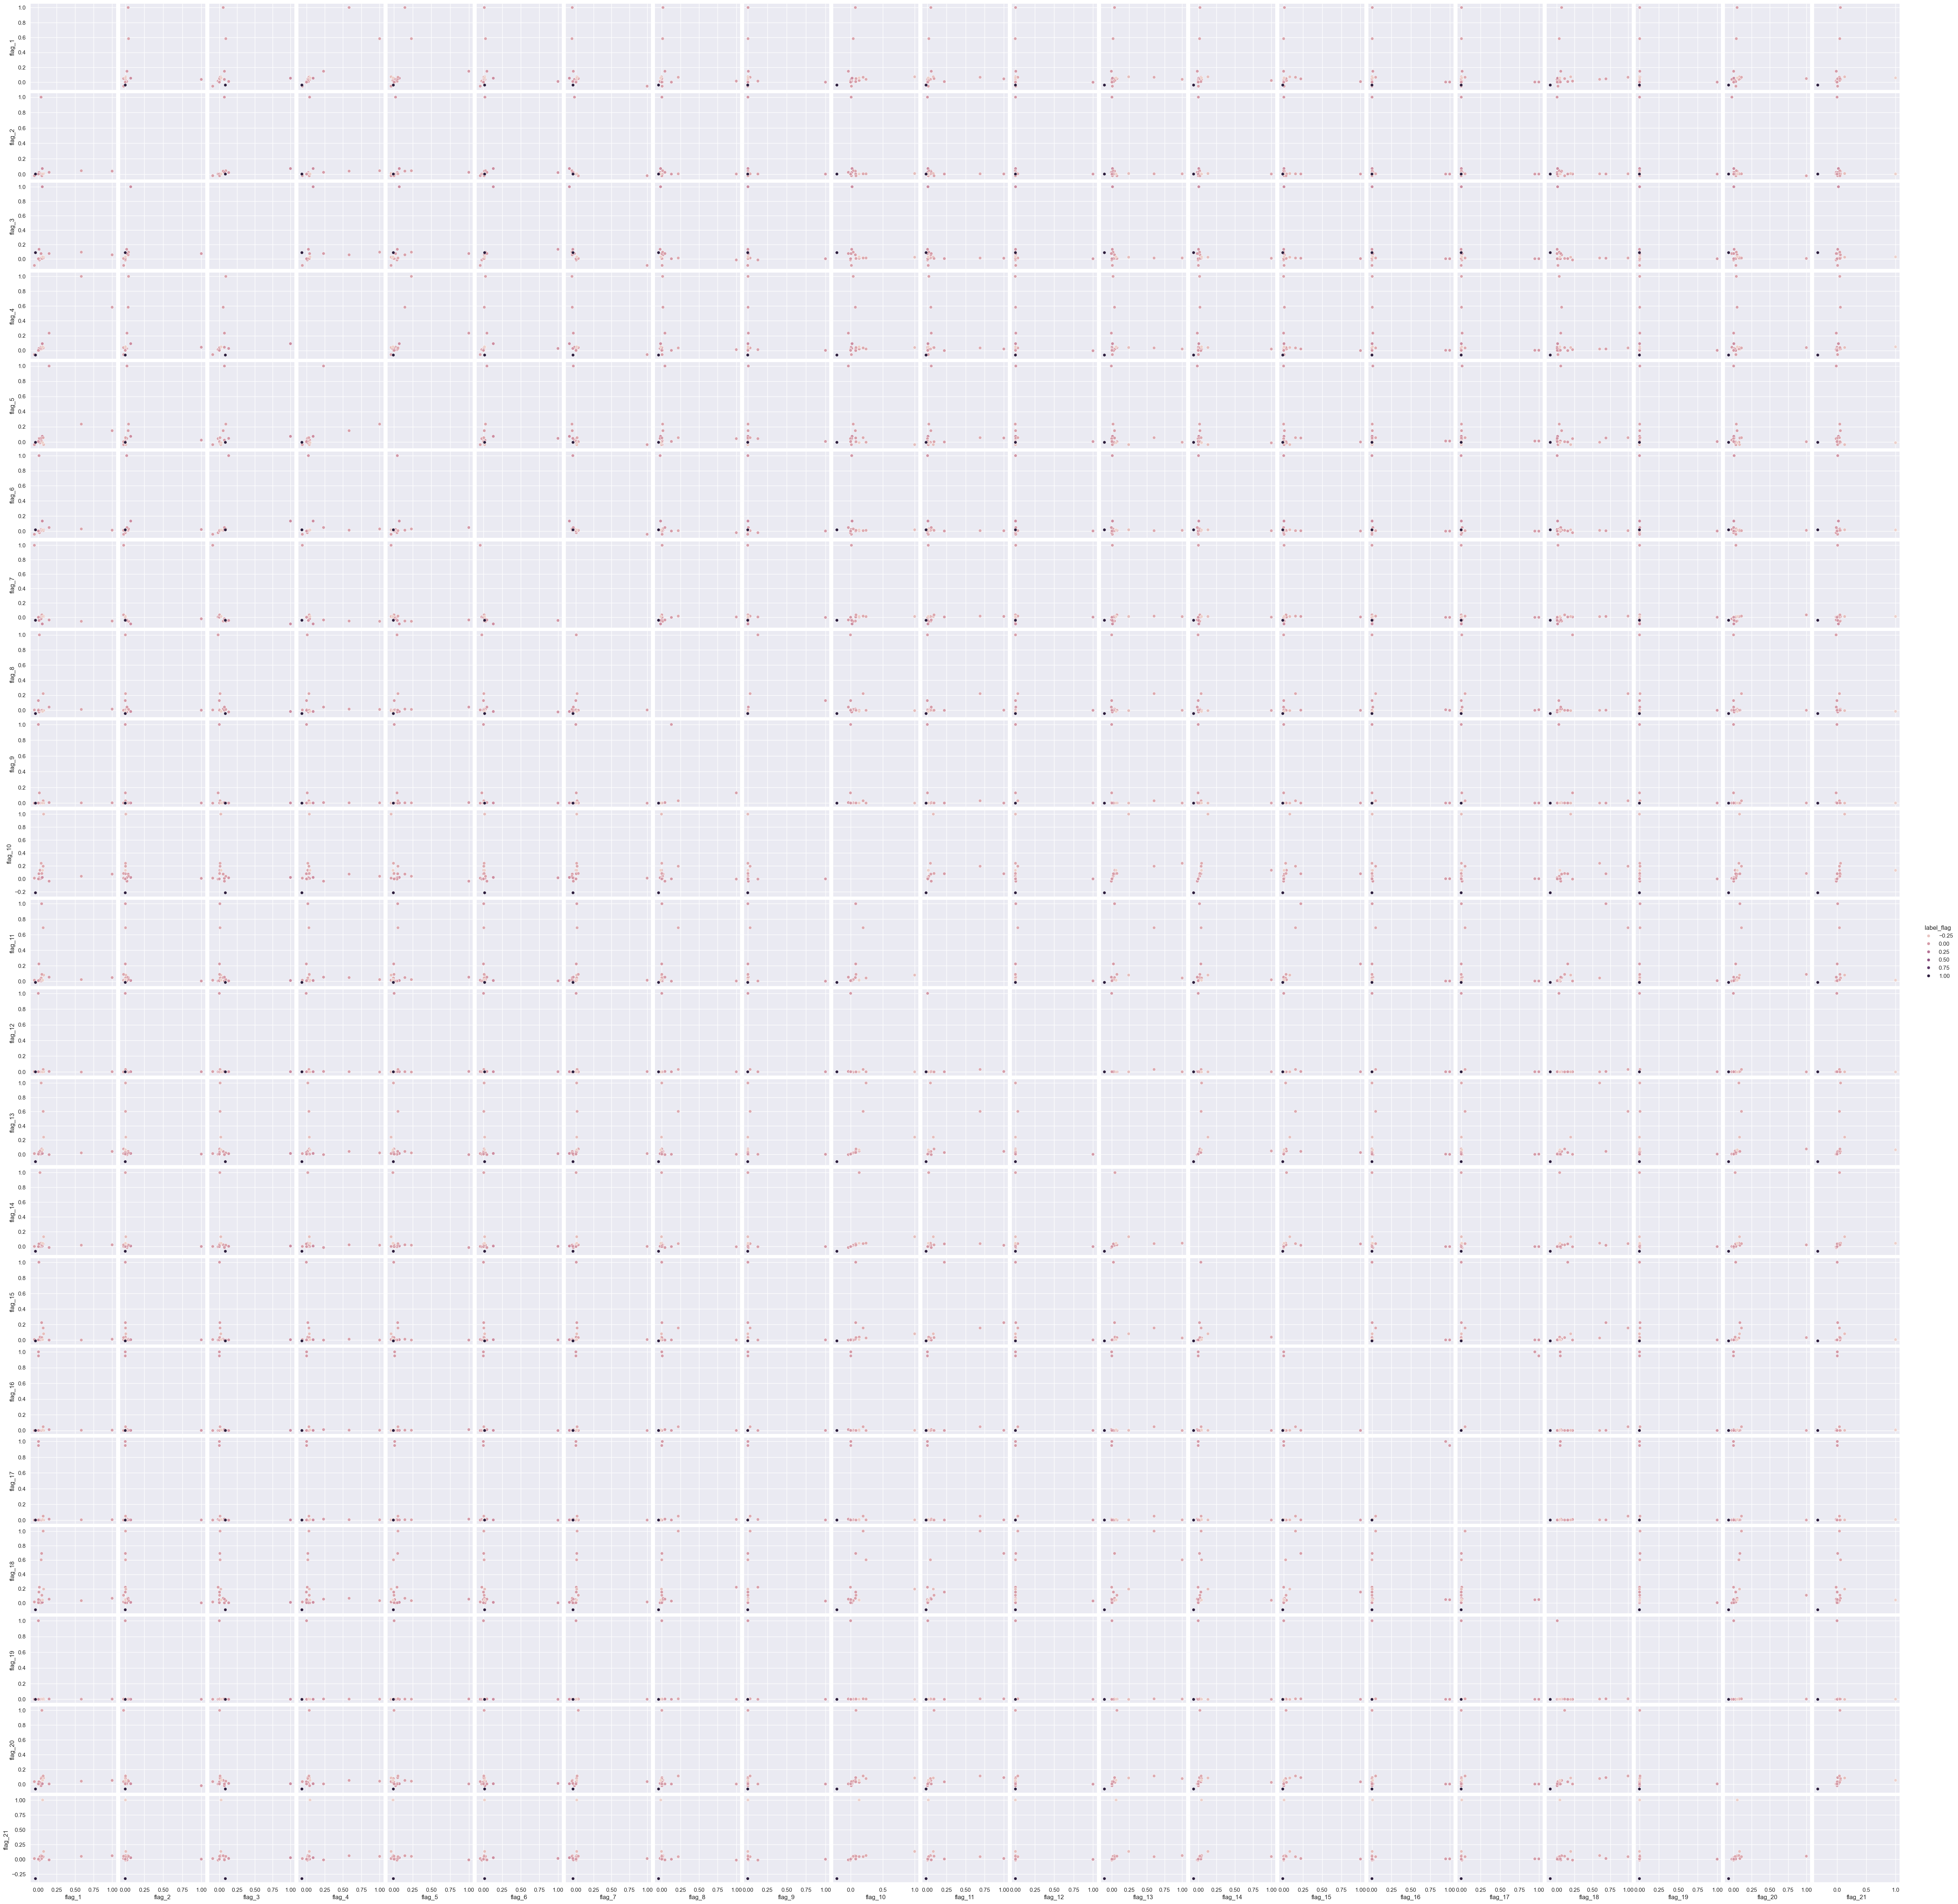

In [59]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[categorical_columns+[target_col]].corr(), hue=target_col)
plt.savefig("pair_plot_cat.png")

Хотела посмотреть корреляцию признаков и таргета, но pycharm исчерпал ресурсы памяти. Первый раз с таким сталкиваюсь. Видимо, потому что на работе вычисления удаленные. Поэтому я сохранила картинку heatmap_main.html, которая была нарисована колабом, рядом в файлики с тетрадкой. А тут нарисовала heatmap, скопировав данные корреляций, опять же, из колаба. 


In [33]:
df[time_label_columns+categorical_columns+[target_col]].corr().style.background_gradient(cmap='coolwarm')

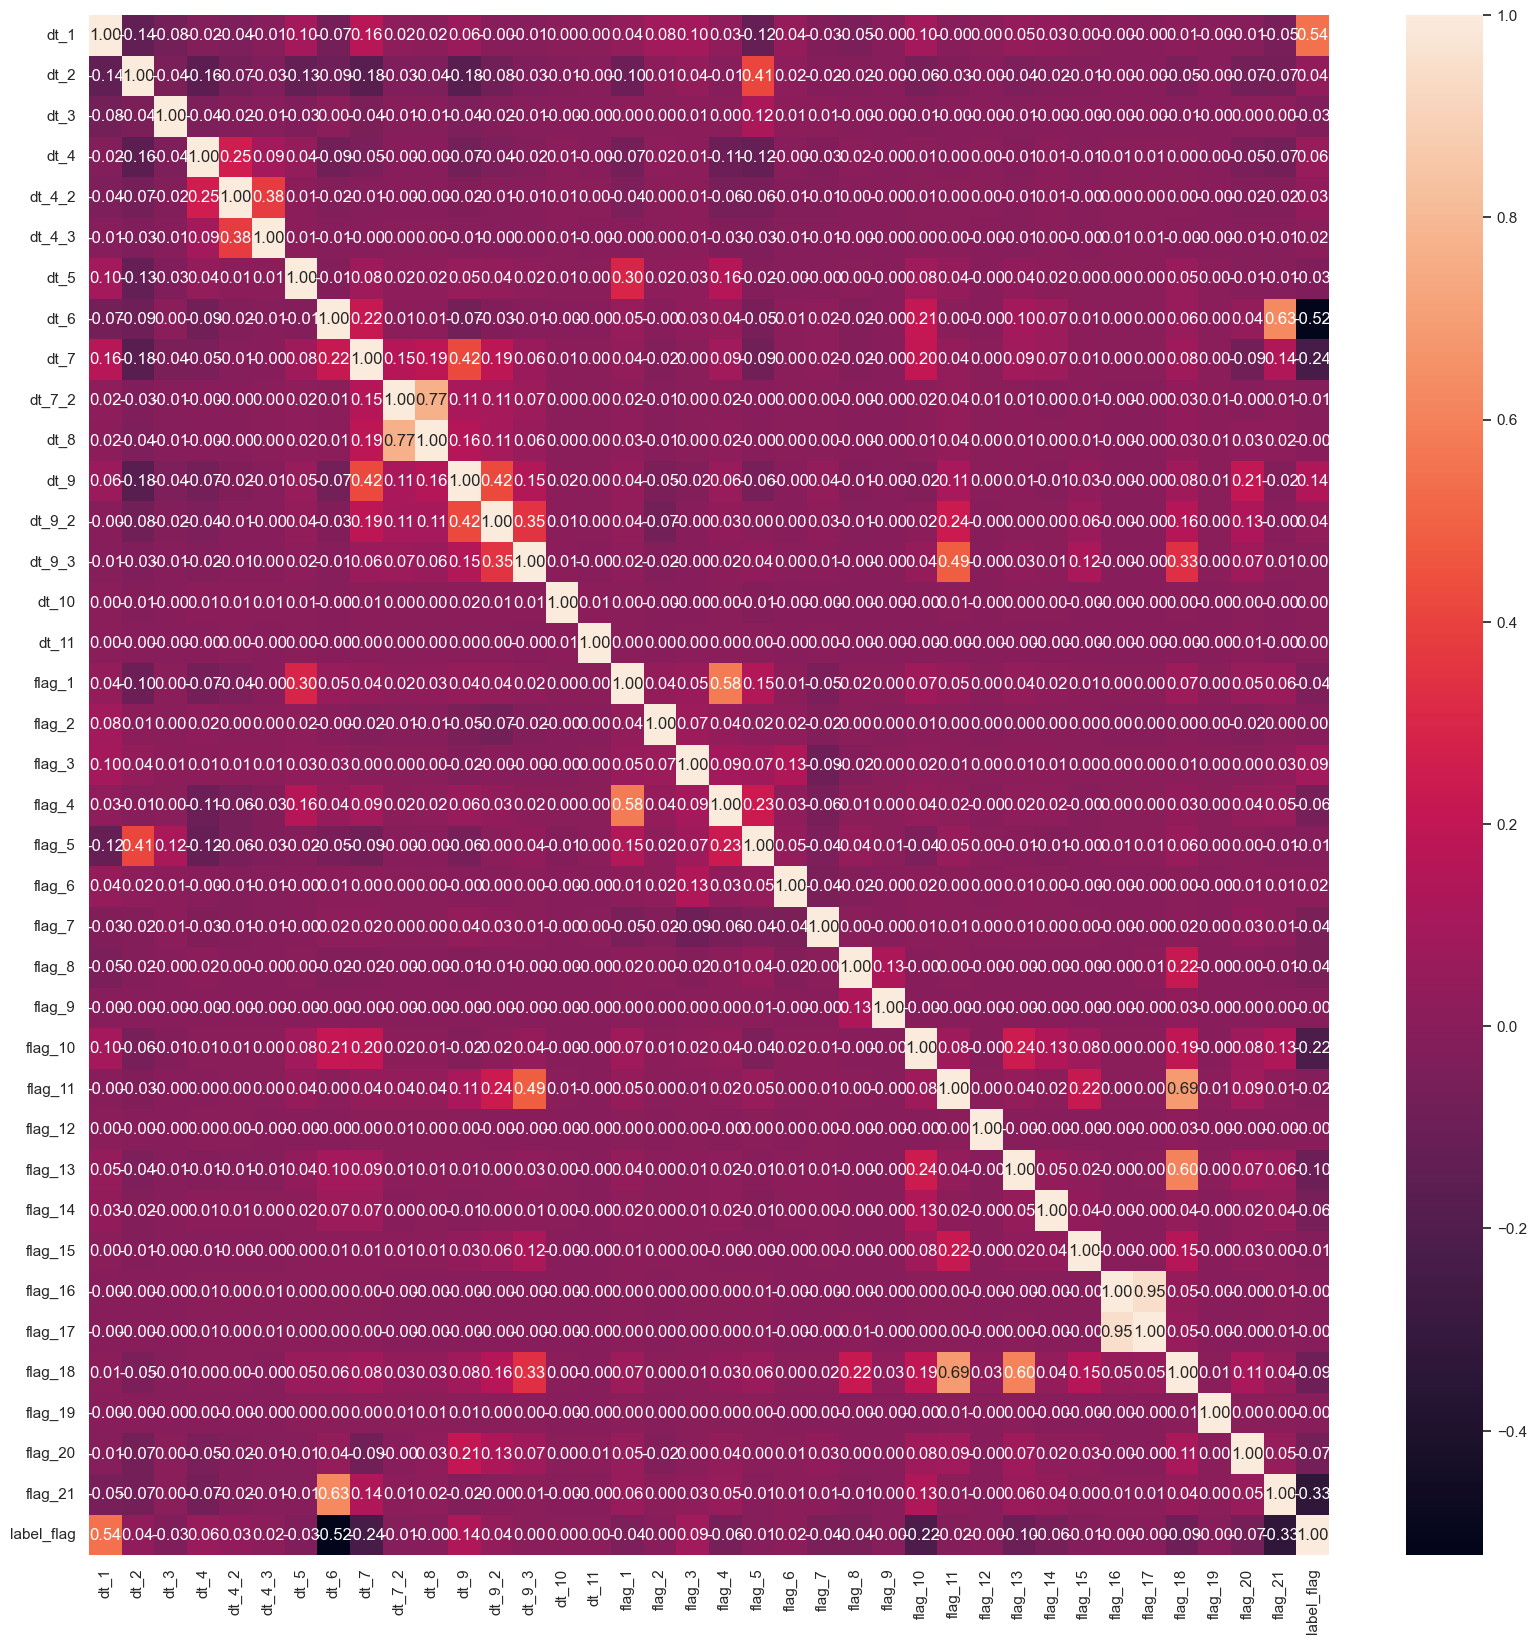

In [50]:
data = pd.read_csv('./heatmap/Лист 1-Tаблица 1.csv', delimiter=';', index_col=0)
plt.figure(figsize=(20, 20))
sns.heatmap(data, annot=True, fmt=".2f")
plt.savefig("heatmap.png")
#data

Как видно, данные коррелируют плохо между собой, но и с таргетом тоже. 

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn import feature_selection as fs

In [62]:
pca = StandardScaler()
pca.fit(df[time_label_columns + categorical_columns])
X = pca.transform(df[time_label_columns + categorical_columns])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, df[target_col], test_size=0.3, random_state=1, stratify=df[target_col])

In [12]:
knn = KNeighborsClassifier(n_neighbors=k)
knn_model = knn.fit(X_train, y_train)

In [13]:
knn_predictions = knn.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, recall_score
accuracy = accuracy_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.9082596089510073
Recall: 0.9082596089510073


In [68]:
from sklearn.svm import LinearSVC

In [69]:
clf = LinearSVC(random_state=0, tol=1e-5, dual=False)

In [70]:
clf.fit(X_train, y_train)

/Users/viktoriaambrosimova/PycharmProjects/pythonProject6/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, random_state=0, tol=1e-05)

In [20]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import KFold

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[time_label_columns+categorical_columns], df[target_col], 
                                                    test_size = .3,
                                                    random_state = 6,
                                                   stratify = df[target_col])

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

In [22]:
kf = KFold(n_splits=6, shuffle=False)

X_train = X_train.values
y_train = y_train.values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
scores = []
for train, test in kf.split(X_train, y_train):
    model = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth = 10)
    model.fit(X_train[train], y_train[train])
    scores.append(model.score(X_train[test], y_train[test]))

[ 47078  47079  47080 ... 282465 282466 282467] [    0     1     2 ... 47075 47076 47077]
[     0      1      2 ... 282465 282466 282467] [47078 47079 47080 ... 94153 94154 94155]
[     0      1      2 ... 282465 282466 282467] [ 94156  94157  94158 ... 141231 141232 141233]
[     0      1      2 ... 282465 282466 282467] [141234 141235 141236 ... 188309 188310 188311]
[     0      1      2 ... 282465 282466 282467] [188312 188313 188314 ... 235387 235388 235389]
[     0      1      2 ... 235387 235388 235389] [235390 235391 235392 ... 282465 282466 282467]


In [23]:
scores

[0.9227664726623901,
 0.924571986915332,
 0.9229364034156081,
 0.9250817791749862,
 0.922511576532563,
 0.9218955775521475]